Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [110]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [58]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

# Define paths to dataset
base_path = r"/content/gdrive/MyDrive/CNN_assignment"
dataset_folder = "Skin cancer ISIC The International Skin Imaging Collaboration"
dataset_path = os.path.join(base_path, dataset_folder)

dataset_path
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration'

In [59]:
# from google.colab import drive
# drive.mount('/content/drive')

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [60]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(dataset_path) / "Train"
data_dir_test = pathlib.Path(dataset_path) / "Test"

print(f"Does Train Path Right: {data_dir_train.exists()}")
print(f"Does Test Path Right: {data_dir_test.exists()}")

Does Train Path Right: True
Does Test Path Right: True


In [61]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f'Number of image in training set: {image_count_train}')
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f'Number of image in test set: {image_count_test}')

Number of image in training set: 2239
Number of image in test set: 118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [62]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [63]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = 'training',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [64]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = 'validation',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [65]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(f'List of classes of skin cancers:\n' + "\n".join(class_names))

List of classes of skin cancers:
actinic keratosis
basal cell carcinoma
dermatofibroma
melanoma
nevus
pigmented benign keratosis
seborrheic keratosis
squamous cell carcinoma
vascular lesion


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [66]:
# Get the first class folder
sample_class = next(data_dir_train.iterdir())

In [67]:
# Get a list of images in the class folder
sample_images = list(sample_class.glob("*.jpg"))

In [68]:
# Select a sample image (e.g., the 10th image)
sample_image_path = sample_images[10]
sample_image_path

PosixPath('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/ISIC_0025599.jpg')

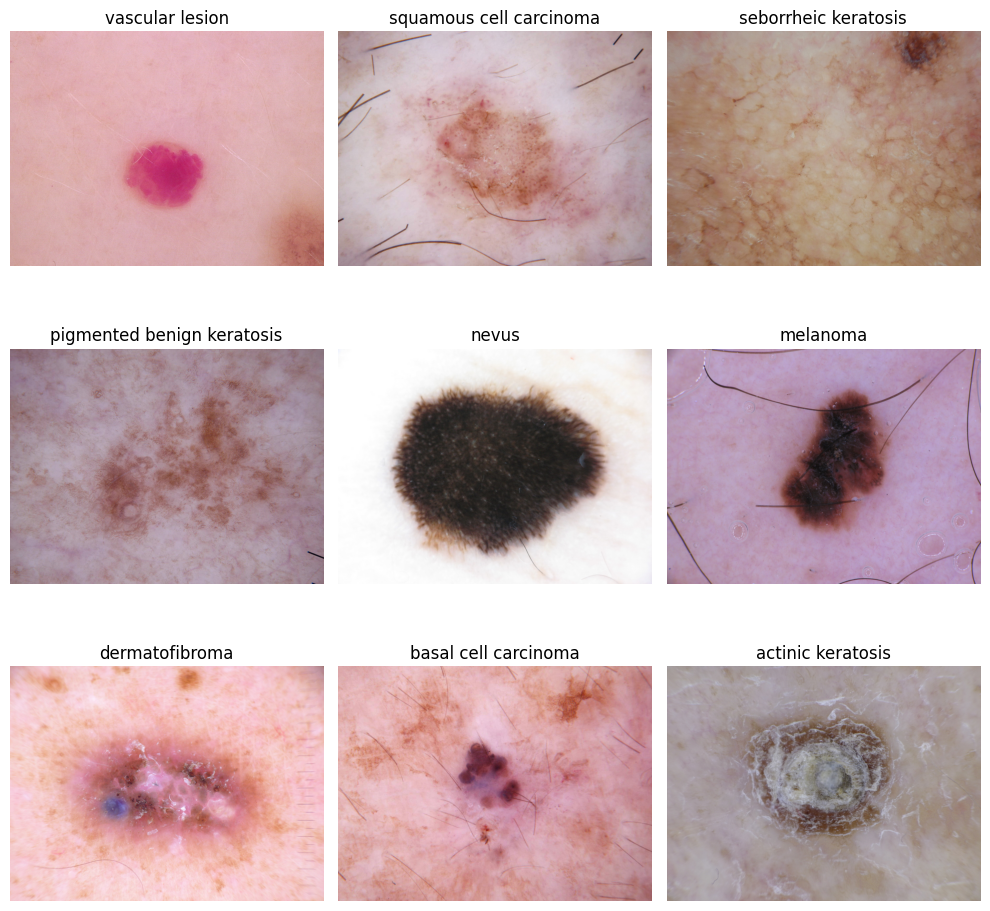

In [69]:
### your code goes here, you can use training or validation data to visualize

# Open image using PIL
image_pil = PIL.Image.open(sample_image_path)

# Convert PIL image to NumPy array
image_np = np.array(image_pil)

def display_sample_images(data_dir_train):
    """
    Randomly selects one image from each class in the training directory
    and displays them in a 3x3 grid with class names as titles.
    """
    import random
    # Convert to pathlib Path
    train_path = pathlib.Path(data_dir_train)

    # Get all class directories
    class_dirs = [d for d in train_path.iterdir() if d.is_dir()]

    # Set up the figure for a 3x3 grid
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))

    for ax, class_dir in zip(axes.flatten(), class_dirs):
        # Get all images in the class directory
        image_files = list(class_dir.glob("*.jpg"))

        # Randomly select one image from the class
        if image_files:
            sample_image_path = random.choice(image_files)

            # Open the image with PIL
            image = PIL.Image.open(sample_image_path)

            # Display image
            ax.imshow(image)
            ax.set_title(class_dir.stem)
            ax.axis("off")
    plt.tight_layout()
    plt.show()

# Call the function
display_sample_images(data_dir_train)

In [70]:
# Print shape, data type, and pixel range
print(f"Image Path: {sample_image_path}")
print(f"Original Image Shape (PIL): {image_pil.size}")
print(f"Original Image Shape (NumPy Array): {image_np.shape}")
print(f"Data Type: {image_np.dtype}")
print(f"Pixel Value Range: Min={image_np.min()}, Max={image_np.max()}")

Image Path: /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/ISIC_0025599.jpg
Original Image Shape (PIL): (600, 450)
Original Image Shape (NumPy Array): (450, 600, 3)
Data Type: uint8
Pixel Value Range: Min=40, Max=238


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [71]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [72]:
### Your code goes here
# Build CNN Model
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [73]:
### Todo, choose an appropirate optimiser and loss function
# Compile Model
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
# View the summary of all layers
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │      21,233,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,656,393 (82.61 MB)

 Trainable params: 21,656,393 (82.61 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [75]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 712s 3s/step - accuracy: 0.2039 - loss: 2.7583 - val_accuracy: 0.2058 - val_loss: 2.0430
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.2011 - loss: 2.0455 - val_accuracy: 0.2215 - val_loss: 2.0545
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.2598 - loss: 1.9927 - val_accuracy: 0.2617 - val_loss: 1.9112
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.3133 - loss: 1.8725 - val_accuracy: 0.3848 - val_loss: 1.7334
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.3496 - loss: 1.8095 - val_accuracy: 0.2103 - val_loss: 2.1198
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.3681 - loss: 1.7574 - val_accuracy: 0.4899 - val_loss: 1.5288
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4109 - loss: 1.6193 - val_accuracy: 0.4407 - val_loss: 1.5947
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4563 - loss: 1.5444 - val_accuracy: 0.4966 - v

### Visualizing training results

In [76]:
def visualise_train_valid_accuracy(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(10, 10))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### **Findings After Model Training**  

1. **Performance Trends:**  
   - **Training accuracy** improved significantly from **20.3% to 68.3%**, showing strong learning.  
   - **Validation accuracy** peaked at **51.0% (epoch 13)** but fluctuated, ending at **50.1% (epoch 20)**.  
   - **Training loss** steadily dropped from **2.75 to 0.92**, indicating effective learning.  
   - **Validation loss** fluctuated, with a significant increase after epoch 16, ending at **1.84**.  

2. **Signs of Overfitting or Underfitting:**  
   - **Initial Underfitting:** The first few epochs had low accuracy and high loss.  
   - **Overfitting Signs:** After epoch 13, the **training accuracy continued improving**, but **validation loss increased significantly (2.22 in epoch 18)**.  
   - **Possible overfitting after epoch 13** since training accuracy continued improving while validation performance fluctuated.  

3. **Comparison to Previous Model:**  
   - **Higher Training Accuracy:** **(68.3% vs. 54.5%)**, suggesting stronger learning.  
   - **Similar Peak Validation Accuracy:** **(51.0% vs. 54.8%)**, but fluctuating more in this run.  
   - **More Overfitting:** The **previous model had less fluctuation in validation loss**, whereas this one has **a sharp increase after epoch 16**.  

### Write your findings here

In [77]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augmentation1 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width,3)),
    tf.keras.layers.RandomRotation(0.1, fill_mode='nearest'),
    tf.keras.layers.RandomZoom(0.1, fill_mode='nearest'),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.GaussianNoise(0.05)
])

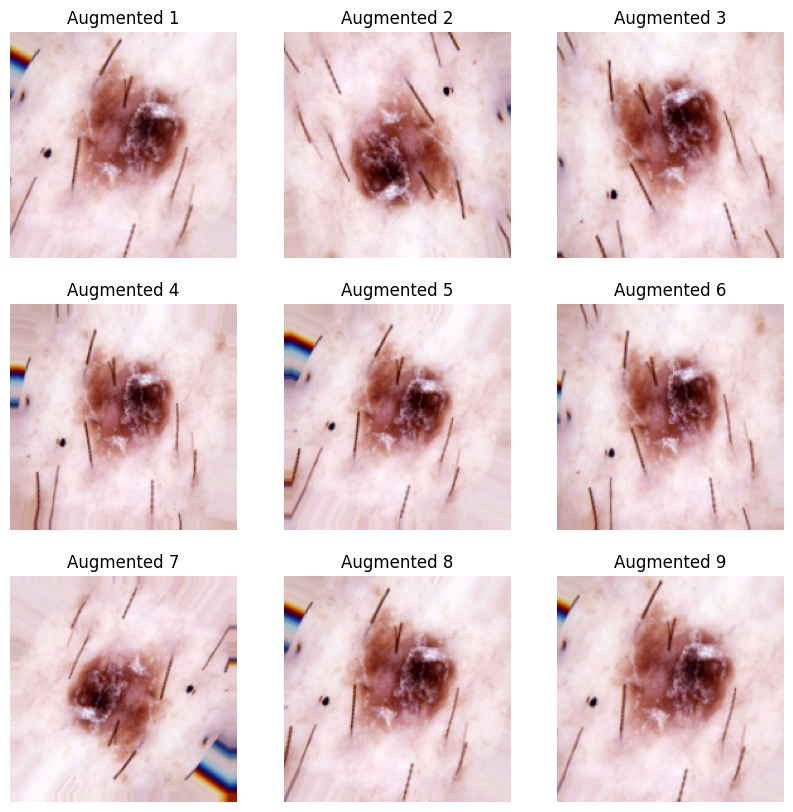

In [78]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
      augmented_image = data_augmentation1(images)
      plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_image[0].numpy().astype("uint8"))
      plt.title(f"Augmented {i + 1}")
      plt.axis("off")
plt.show()

### Todo:
### Create the model, compile and train the model


In [79]:
model_2= keras.Sequential([
    data_augmentation1,
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])

model_2.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │      21,233,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,656,393 (82.61 MB)

 Trainable params: 21,656,393 (82.61 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
epochs = 20
history_2 = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.1873 - loss: 3.4330 - val_accuracy: 0.2058 - val_loss: 2.1176
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.2284 - loss: 2.0711 - val_accuracy: 0.0984 - val_loss: 2.1173
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.2401 - loss: 2.0232 - val_accuracy: 0.3221 - val_loss: 1.8366
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.2959 - loss: 1.9056 - val_accuracy: 0.3870 - val_loss: 1.7451
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3517 - loss: 1.7597 - val_accuracy: 0.4787 - val_loss: 1.5774
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4227 - loss: 1.6130 - val_accuracy: 0.4653 - val_loss: 1.5664
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4212 - loss: 1.6756 - val_accuracy: 0.4206 - val_loss: 1.6094
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4346 - loss: 1.5754 - val_accuracy: 0.2685 - v

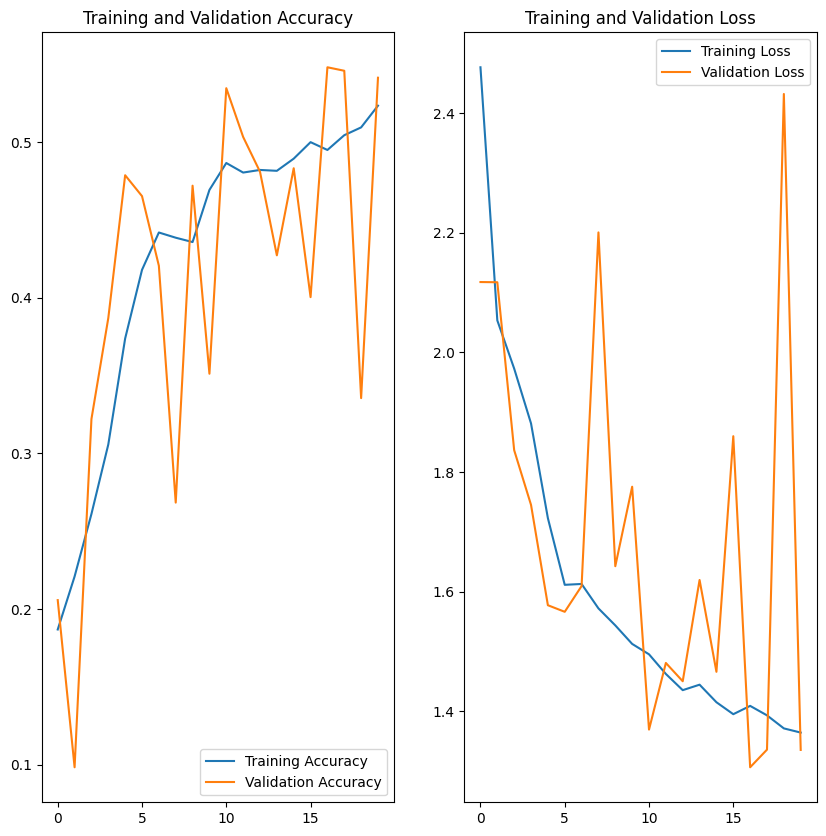

In [81]:
visualise_train_valid_accuracy(history_2, epochs)

### **Findings After Model Training**  

1. **Performance Trends:**  
   - **Training accuracy** improved from **18.7% to 54.5%**, showing the model is learning well.  
   - **Validation accuracy** peaked at **54.8% (epoch 17)** but fluctuated, ending at **54.1% (epoch 20)**.  
   - **Training loss** steadily dropped from **3.43 to 1.39**, indicating effective learning.  
   - **Validation loss** showed fluctuations, **dropping to 1.30 (epoch 17) but spiking to 2.43 (epoch 19)**, ending at **1.33 (epoch 20)**.  

2. **Signs of Overfitting or Underfitting:**  
   - **Initial Underfitting:** The first few epochs had low accuracy and high loss.  
   - **Overfitting Signs:** After epoch 10, the **training accuracy remained high**, but **validation loss fluctuated significantly**, peaking in epoch 19.  
   - This suggests the model is **memorizing training data rather than generalizing well**.  

3. **Comparison to Previous Model:**  
   - **Higher Training Accuracy:** This model achieved **54.5% vs. 47.6%** in the previous run.  
   - **Better Peak Validation Accuracy:** The peak validation accuracy improved **(54.8% vs. 50.1%)**.  
   - **More Validation Loss Instability:** The previous model had fluctuations but was more stable near the end, whereas this model shows **large jumps** (e.g., epoch 19).  

In [82]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here

model_3 = keras.Sequential([
    data_augmentation1,
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # layers.Dropout(0.25),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # layers.Dropout(0.25),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Dropout(0.25),  # Added dropout after last Conv layer
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),  # Added dropout after first Dense layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(9, activation='softmax')  # Output layer
])

### Compiling the model

In [83]:
## Your code goes here
model_3.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │      21,233,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,656,393 (82.61 MB)

 Trainable params: 21,656,393 (82.61 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [84]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history_3 = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.1500 - loss: 2.2943 - val_accuracy: 0.2058 - val_loss: 2.0315
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.1922 - loss: 2.0464 - val_accuracy: 0.2148 - val_loss: 2.0227
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.1920 - loss: 2.0451 - val_accuracy: 0.2170 - val_loss: 2.0201
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.2363 - loss: 1.9760 - val_accuracy: 0.1812 - val_loss: 1.9485
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.2758 - loss: 1.9360 - val_accuracy: 0.2931 - val_loss: 1.8473
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.2788 - loss: 1.8779 - val_accuracy: 0.3982 - val_loss: 1.7468
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.3162 - loss: 1.8079 - val_accuracy: 0.4318 - val_loss: 1.6400
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.3391 - loss: 1.7928 - val_accuracy: 0.3512 - v

### Visualizing the results

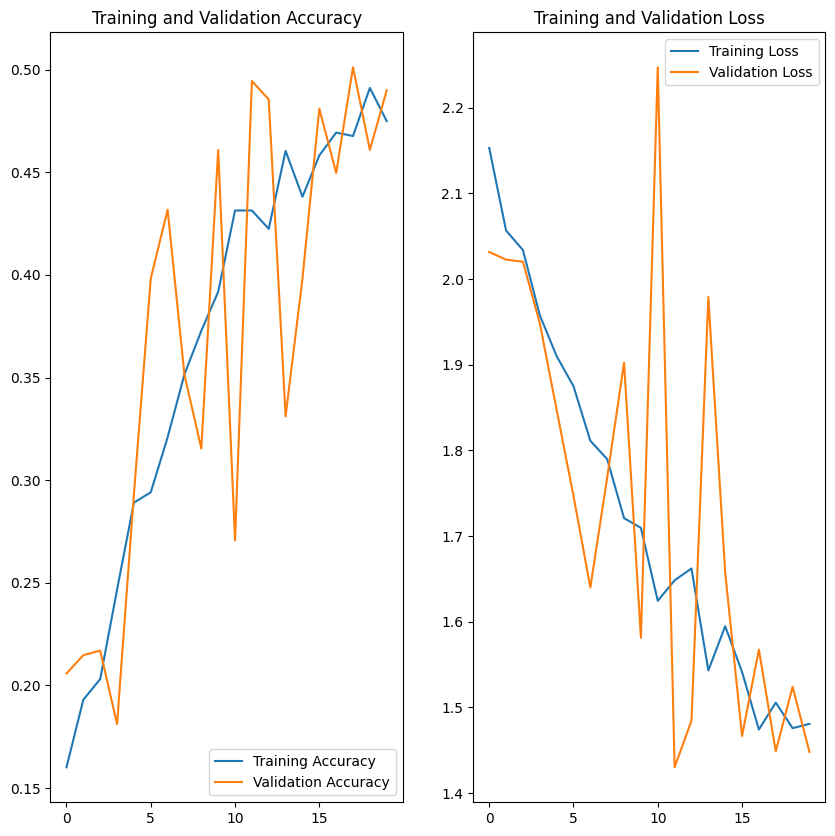

In [85]:
visualise_train_valid_accuracy(history_3, epochs)

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### **Findings After Model Training**

1. **Performance Trends:**
   - The **training accuracy** started at **15%** and gradually improved to **~47.6%** by epoch 20.
   - The **validation accuracy** fluctuated but peaked at **50.1%** in epoch 18, indicating some improvement in generalization.
   - The **training loss** steadily decreased from **2.29 to 1.47**, showing the model is learning the training data well.
   - The **validation loss** fluctuated but ended at **1.44**, suggesting some instability in generalization.

2. **Signs of Overfitting or Underfitting:**
   - **Underfitting Initially:** In the first few epochs, both training and validation accuracies were low, and the model struggled to learn effectively.
   - **Some Overfitting Later:** The **training accuracy remained higher** than validation accuracy, and the validation loss showed fluctuations (e.g., spiking at epoch 11, 14).
   - However, **compared to the previous model**, where validation accuracy was highly unstable, this version shows a slightly **better learning trend**.

3. **Comparison to Previous Model:**
   - **Improved Training Accuracy:** The training accuracy is higher in this run (~47.6% vs. ~50% before).
   - **Validation Accuracy Shows Some Stability:** The previous run had **wild fluctuations** in validation accuracy, while this run shows more consistency.
   - **Validation Loss Still Unstable:** The validation loss is still fluctuating, meaning the model struggles with generalization.

### **Next Steps to Improve the Model**
To reduce overfitting and stabilize validation loss:
1. **Increase Regularization:**  
   - Add **L2 regularization** to convolutional and dense layers.
   
2. **Use a Learning Rate Scheduler:**  
   - Implement `ReduceLROnPlateau` to adapt learning rate dynamically.

3. **Enhance Data Augmentation:**  
   - Increase transformation variations to improve generalization.

4. **Increase Dropout in Dense Layers:**  
   - Add a **dropout layer (0.4 - 0.5)** after the first dense layer.

5. **Use Early Stopping:**  
   - Stop training when validation loss stops improving.

#### **Conclusion:**
- There is some **improvement in training and validation accuracy** compared to the previous model.
- However, **overfitting remains a concern**, and **validation loss fluctuation** indicates that the model still struggles with generalization.
- Applying the above techniques will likely yield further improvements.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [86]:
path_list=[]
lesion_list=[]

for i in class_names:
  for j in data_dir_train.glob(i+'/*.jpg'):
    path_list.append(str(j))
    lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])
original_df


,Path,Label
0,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
1,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
2,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
3,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
4,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion
2235,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion
2236,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion
2237,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion


<BarContainer object of 9 artists>

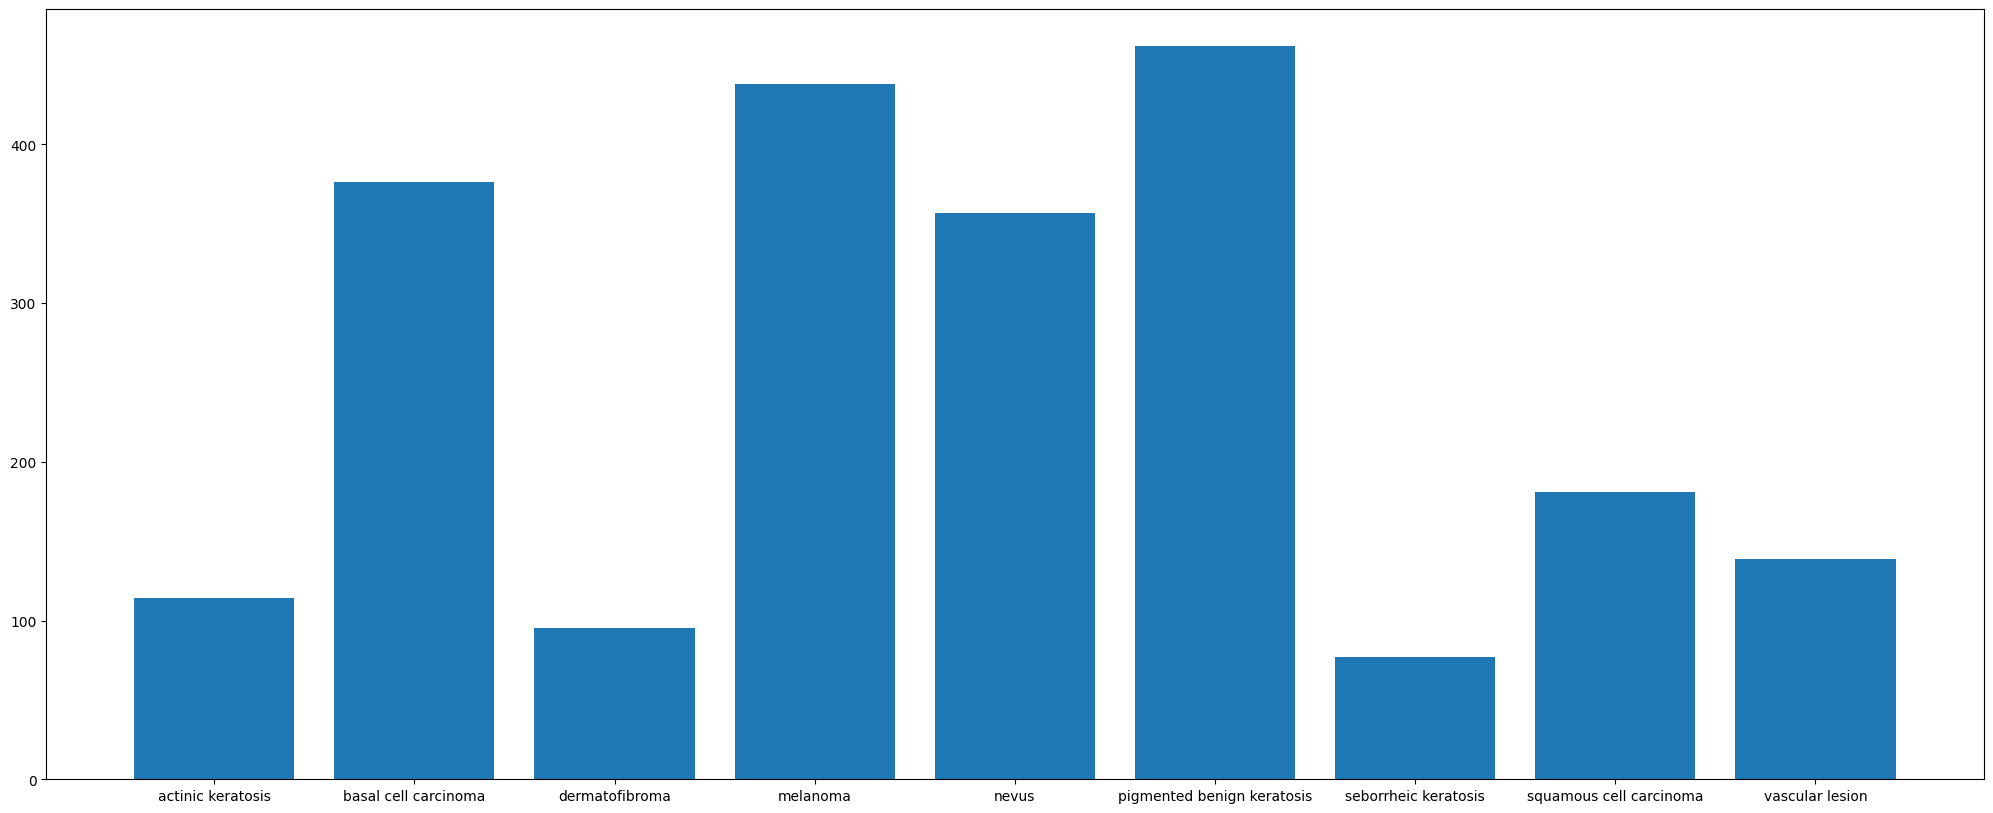

In [88]:
class_count=[]
for i in class_names:
    class_count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,class_count)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
     - Seborrheic Keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
     - Pigmented Benign Keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [89]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [90]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset / i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)
    ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C10C14BD250>: 100%|██████████| 500/500 [00:24<00:00, 20.74 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C10C134ED50>: 100%|██████████| 500/500 [00:17<00:00, 29.01 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C10C1177E10>: 100%|██████████| 500/500 [00:17<00:00, 27.86 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C10C02A6290>: 100%|██████████| 500/500 [01:31<00:00,  5.44 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7C10C138A590>: 100%|██████████| 500/500 [01:18<00:00,  6.38 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C10C139E610>: 100%|██████████| 500/500 [00:19<00:00, 25.92 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C1170320950>: 100%|██████████| 500/500 [00:38<00:00, 13.06 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C10C1379910>: 100%|██████████| 500/500 [00:18<00:00, 27.62 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C10C1656C90>: 100%|██████████| 500/500 [00:17<00:00, 28.38 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [92]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [93]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0032932.jpg_012c97ba-db2f-47c8-b9d3-c68b1a17a66c.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0031276.jpg_de99f111-990f-4600-b6ae-452bbb89b92f.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0026467.jpg_811761ec-0c94-4830-8593-45ab4f4f1aee.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0025244.jpg_6b4f1acc-d5b0-4b55-8acd-83d9a664efd9.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/

In [94]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [95]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [97]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)

In [98]:
new_df['Label'].value_counts()

,count
Label,
pigmented benign keratosis,962
melanoma,938
basal cell carcinoma,876
nevus,857
squamous cell carcinoma,681
vascular lesion,639
actinic keratosis,614
dermatofibroma,595
seborrheic keratosis,577


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [99]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [101]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [102]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [105]:
## your code goes here

model_4 = keras.Sequential([
    data_augmentation1,
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),
    # layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # layers.Dropout(0.25),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # layers.Dropout(0.25),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Dropout(0.25),  # Added dropout after last Conv layer
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),  # Added dropout after first Dense layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(9, activation='softmax')  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [106]:
## your code goes here
model_4.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_4.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_7 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 89, 89, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │      21,233,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,656,521 (82.61 MB)

 Trainable params: 21,656,457 (82.61 MB)

 Non-trainable params: 64 (256.00 B)

#### **Todo:**  Train your model

In [107]:
epochs = 30
history_4 = model_4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 45s 242ms/step - accuracy: 0.2401 - loss: 3.1464 - val_accuracy: 0.1433 - val_loss: 2.2438
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 244ms/step - accuracy: 0.3572 - loss: 1.7287 - val_accuracy: 0.1678 - val_loss: 2.0901
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 79s 229ms/step - accuracy: 0.3943 - loss: 1.5959 - val_accuracy: 0.2390 - val_loss: 2.0356
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 45s 250ms/step - accuracy: 0.4337 - loss: 1.4964 - val_accuracy: 0.3311 - val_loss: 2.1903
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 78s 226ms/step - accuracy: 0.4762 - loss: 1.4029 - val_accuracy: 0.4759 - val_loss: 1.3745
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 43s 241ms/step - accuracy: 0.5032 - loss: 1.3039 - val_accuracy: 0.2918 - val_loss: 2.4913
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 234ms/step - accuracy: 0.5392 - loss: 1.2560 - val_accuracy: 0.1975 - val_loss: 5.7265
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 43s 245ms/step - accuracy: 0.5823 - loss: 1

#### **Todo:**  Visualize the model results

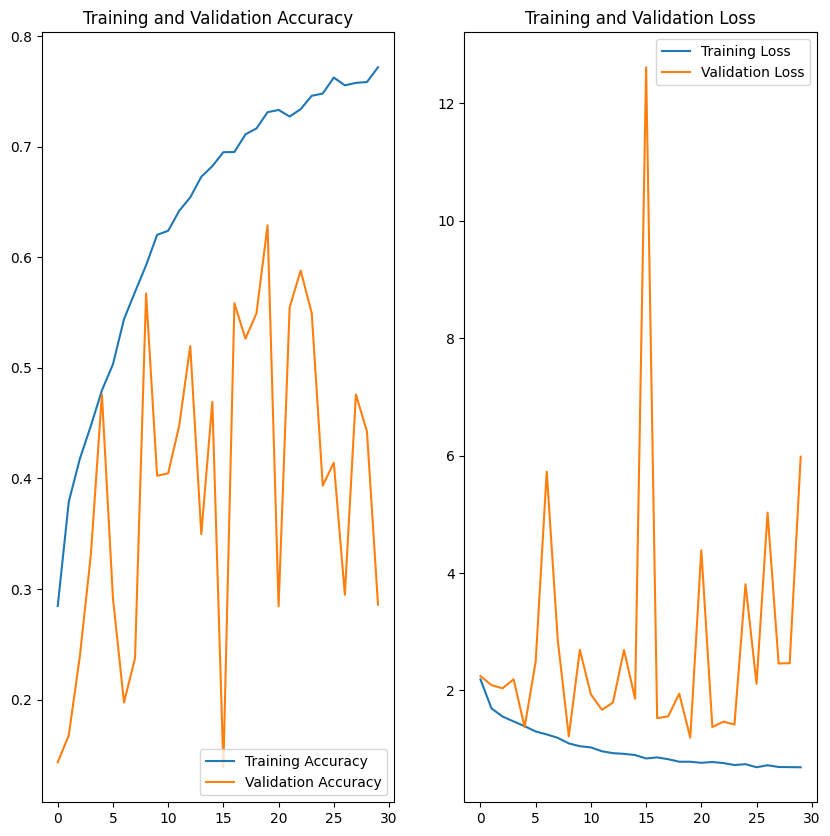

In [109]:
visualise_train_valid_accuracy(history_4, epochs)

### **Analysis of Model Performance**
Looking at the graphs:

1. **Training vs. Validation Accuracy (Left Plot)**
   - The **training accuracy** increases steadily, reaching around **0.75**.
   - The **validation accuracy** fluctuates heavily and does not show a clear upward trend. This suggests the model is **not generalizing well**.

2. **Training vs. Validation Loss (Right Plot)**
   - The **training loss** decreases smoothly, indicating that the model is learning on the training data.
   - The **validation loss** fluctuates significantly and remains much higher than the training loss, with occasional large spikes (especially around epoch 15). This suggests the model is **overfitting**.

---

### **What Needs to Be Done?**
Since the model is **overfitting** (high training accuracy, fluctuating/poor validation accuracy), we need to:
1. **Increase Regularization:**
   - Add **L2 regularization** to Conv2D and Dense layers:

2. **Improve Data Augmentation:**
   - Your augmentation strategy is good, but **increase transformations**:

3. **Increase Dropout Rate:**
   - Current dropout (0.26 - 0.3) may not be enough.
   - Increase to **0.4 - 0.5** in later layers:

4. **Reduce Model Complexity:**
   - The model may be too **complex** for the dataset size.
   - Reduce the number of Conv2D filters (e.g., 256 → 128).

6. **Reduce Learning Rate:**
   - Try using **a learning rate scheduler** to reduce the rate after some epochs


In [112]:
## your code goes here

model_5 = keras.Sequential([
    data_augmentation1,
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),
    # layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # layers.Dropout(0.25),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    # layers.Dropout(0.25),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Dropout(0.25),  # Added dropout after last Conv layer
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),  # Added dropout after first Dense layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(9, activation='softmax')  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [113]:
## your code goes here
model_5.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
learning_rate_decay = ReduceLROnPlateau(monitor = 'val_accuracy',
                                        patience = 5, verbose = 1,
                                        factor = 0.2, min_lr = 1e-7)
model_5.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_9 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 89, 89, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 256)                 │      21,233,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,656,521 (82.61 MB)

 Trainable params: 21,656,457 (82.61 MB)

 Non-trainable params: 64 (256.00 B)

In [114]:
epochs = 50
history_5 = model_5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[learning_rate_decay]
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 44s 245ms/step - accuracy: 0.2714 - loss: 3.0669 - val_accuracy: 0.1871 - val_loss: 2.2973 - learning_rate: 0.0010
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 84s 260ms/step - accuracy: 0.3866 - loss: 1.6586 - val_accuracy: 0.2175 - val_loss: 2.0574 - learning_rate: 0.0010
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 80s 249ms/step - accuracy: 0.4430 - loss: 1.4949 - val_accuracy: 0.4284 - val_loss: 1.4567 - learning_rate: 0.0010
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 43s 252ms/step - accuracy: 0.4619 - loss: 1.4085 - val_accuracy: 0.4707 - val_loss: 1.3490 - learning_rate: 0.0010
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 85s 271ms/step - accuracy: 0.4887 - loss: 1.3774 - val_accuracy: 0.5226 - val_loss: 1.2807 - learning_rate: 0.0010
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 75s 230ms/step - accuracy: 0.5239 - loss: 1.2934 - val_accuracy: 0.2932 - val_loss: 3.1815 - learning_rate: 0.0010
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 43s 241ms/step - accuracy: 0.5

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



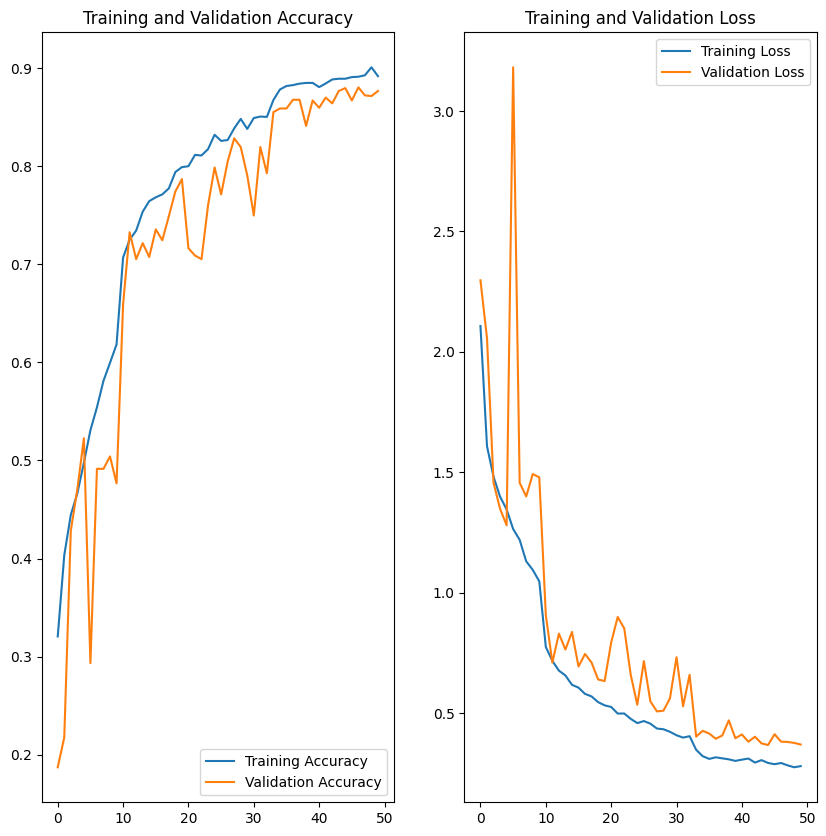

In [115]:
visualise_train_valid_accuracy(history_5, epochs)

**Summary:**

These graphs depict the training and validation performance of a machine learning model over 50 epochs.

* **Accuracy (Left Graph):**
    * The training accuracy steadily increases over epochs, reaching nearly 90% by the end.
    * The validation accuracy also increases, but with more fluctuations, and plateaus around 85-87%.
    * The gap between training and validation accuracy suggests some degree of overfitting, as the model performs slightly better on the training data than on unseen validation data.

* **Loss (Right Graph):**
    * The training loss rapidly decreases in the early epochs and continues to decline, albeit at a slower rate, reaching a low value by epoch 50.
    * The validation loss also decreases initially, but shows more variability and plateaus, indicating the model's performance on unseen data is no longer improving significantly.
    * The Loss graph further confirms the possibility of overfitting.

**In essence, the model is learning well on the training data but is starting to show signs of overfitting. Further steps like regularization or early stopping might be needed to improve generalization.**
